## Titanic data set - Binary classification problem

---

From challenge at https://www.kaggle.com/c/titanic/data the aim is to predict survival of passengers

We will have available:
- training .csv => model will be train with those data, therefore contains X_train and y_train
- test .csv => contains X_test
- submitting data .csv => contains y_test

Important note: Classification accuracy obtained so far = 0.98325

---

In [1]:
# Loading pkg/methods we will needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Loading data, first analysis, wrangling if needed, and further data analysis to prepare for modeling

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analyzing NaN values and dropping columns if needed, in this case 'Cabin' column

In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
col_train_drop = df_train[['Name','Ticket','Cabin','Embarked','PassengerId']]
df_train.drop(columns = col_train_drop, inplace = True)

In [7]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


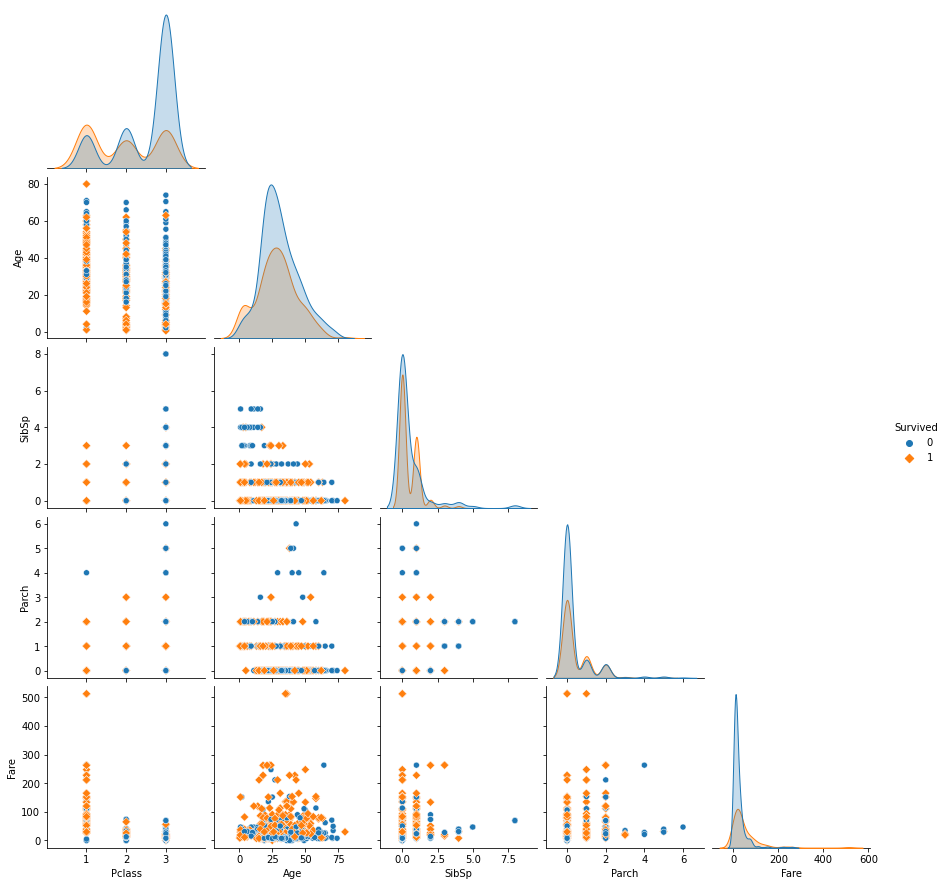

In [8]:
import seaborn as sns
sns.pairplot(df_train, hue = 'Survived', corner = True, kind = 'scatter', markers=["o", "D"]);

In [9]:
df_train.replace({'female':0,'male':1}, inplace = True)
df_train.groupby(['Survived','Sex']).size()

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
dtype: int64

In [10]:
df_train[['Age']].agg(['min','max','median','mean'])

,Age
min,0.420000
max,80.000000
median,28.000000
mean,29.699118


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

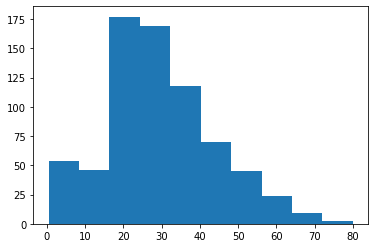

In [11]:
plt.hist(df_train['Age'])

In [12]:
ageMean = df_train[['Age']].mean().values
ageMean

array([29.69911765])

In [13]:
df_train['Age'].fillna(0, inplace = True)
df_train['Age'].replace({0:ageMean}, inplace = True)
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [14]:
df_train['Age'] = pd.cut(df_train['Age'], bins=[0, 10, 70, 80], include_lowest=True, labels=['young', 'adult', 'old'])
df_train['Age'].replace({'young':0,'adult':1,'old':2}, inplace = True)

In [15]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,1,0,7.2500
1,1,1,0,1,1,0,71.2833
2,1,3,0,1,0,0,7.9250
3,1,1,0,1,1,0,53.1000
4,0,3,1,1,0,0,8.0500


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

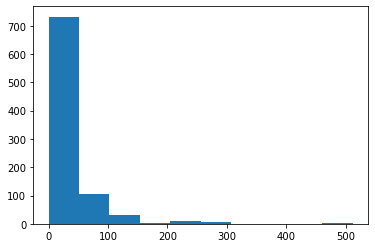

In [16]:
plt.hist(df_train['Fare'])

In [17]:
mn,mx = df_train['Fare'].max(),df_train['Fare'].min()
print(mn,mx)

512.3292 0.0


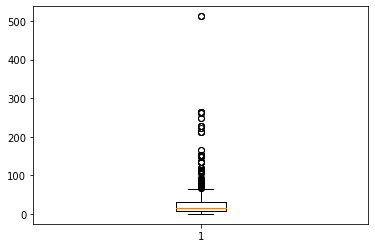

In [18]:
b = plt.boxplot(df_train['Fare']);
plt.show()

In [19]:
fareMedian,fareMean = df_train['Fare'].median(),df_train['Fare'].mean()
print(fareMedian)
print(fareMean)

14.4542
32.2042079685746


In [20]:
df_train['Fare'] = pd.cut(df_train['Fare'], bins=[0, 100, 600], include_lowest=True, labels=['B', 'A'])

In [21]:
df_train['Fare'].replace({'B':0,'A':1}, inplace = True)

In [22]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,1,0,0
1,1,1,0,1,1,0,0
2,1,3,0,1,0,0,0
3,1,1,0,1,1,0,0
4,0,3,1,1,0,0,0


In [23]:
df_train['SibSp'] = pd.cut(df_train['SibSp'], bins=[0, 2, 8], include_lowest=True, labels=['few', 'many'])
df_train['SibSp'].replace({'few':0,'many':1}, inplace = True)
print(df_train.shape)
df_train.head()

(891, 7)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,0,0,0
1,1,1,0,1,0,0,0
2,1,3,0,1,0,0,0
3,1,1,0,1,0,0,0
4,0,3,1,1,0,0,0


In [24]:
print(df_train.shape)

(891, 7)


In [25]:
# We save the final trainCleain data
df_train.to_csv('trainClean.csv', index=False)

#### We will train the model

In [26]:
# We set X_train and y_train from the trainClean data
X_train = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare']].values
y_train = df_train['Survived'].values

In [27]:
# Don't need to normalize the variables since values are in the same order of magnitud
# We train the binary logistic regression model and fit
clf = LogisticRegression(solver='lbfgs',max_iter=3000).fit(X_train, y_train)

#### Now we prepare X_test and y_test

In [28]:
#We use the same process to prepare X_test and y_test
df_test = pd.read_csv('test.csv')

In [29]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
# Same process as before to get
col_test_drop = df_test[['Name','Ticket','Cabin','Embarked']]
df_test.drop(columns = col_test_drop, inplace = True)

In [31]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [32]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [33]:
df_test.shape

(418, 7)

In [34]:
df_test.replace({'female':0,'male':1}, inplace = True)

In [35]:
df_test['Age'].fillna(0, inplace = True)
df_test['Age'].replace({0:ageMean}, inplace = True)
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [36]:
df_test['Age'] = pd.cut(df_test['Age'], bins=[0, 10, 70, 80], include_lowest=True, labels=['young', 'adult', 'old'])
df_test['Age'].replace({'young':0,'adult':1,'old':2}, inplace = True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,1,0,0,7.8292
1,893,3,0,1,1,0,7.0000
2,894,2,1,1,0,0,9.6875
3,895,3,1,1,0,0,8.6625
4,896,3,0,1,1,1,12.2875


In [37]:
df_test['Fare'].fillna(0, inplace = True)
df_test['Fare'].replace({0:fareMean}, inplace = True)
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [38]:
df_test['Fare'] = pd.cut(df_test['Fare'], bins=[0, 100, 600], include_lowest=True, labels=['C', 'B'])
df_test['Fare'].replace({'C':0,'B':1}, inplace = True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,1,0,0,0
1,893,3,0,1,1,0,0
2,894,2,1,1,0,0,0
3,895,3,1,1,0,0,0
4,896,3,0,1,1,1,0


In [39]:
df_test['SibSp'] = pd.cut(df_test['SibSp'], bins=[0, 2, 8], include_lowest=True, labels=['few', 'many'])
df_test['SibSp'].replace({'few':0,'many':1}, inplace = True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,1,0,0,0
1,893,3,0,1,0,0,0
2,894,2,1,1,0,0,0
3,895,3,1,1,0,0,0
4,896,3,0,1,0,1,0


In [40]:
# We save the testClean data
df_test.to_csv('testClean.csv', index=False)

In [41]:
beta = pd.read_csv('gender_submission.csv')
print(beta.shape)
beta.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
# We need to merge X_test and y_test based on PassengerId key, because in the process of cleaning X_test we have removed rows
# that are still contained in y_test.
something = pd.merge(df_test, beta, how='left', on='PassengerId')

In [43]:
print(something.shape)
something.head()

(418, 8)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,1,1,0,0,0,0
1,893,3,0,1,0,0,0,1
2,894,2,1,1,0,0,0,0
3,895,3,1,1,0,0,0,0
4,896,3,0,1,0,1,0,1


In [44]:
# Now we can drop PassengerId column
something.drop(columns = 'PassengerId', inplace = True)
print(something.shape)
something.head()

(418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,1,0,0,0,0
1,3,0,1,0,0,0,1
2,2,1,1,0,0,0,0
3,3,1,1,0,0,0,0
4,3,0,1,0,1,0,1


In [45]:
something.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [46]:
# We can prepare our test data, X_test and y_test
y_test = something['Survived']
X_test = something[['Pclass','Sex','Age','SibSp','Parch','Fare']].values

In [47]:
# Using the model already fitted, we calculate the predictions y_hat
y_hat = clf.predict(X_test)

f1score =  0.976897689768977
accuracy =  0.9832535885167464
precision =  0.9639088691023163
recall =  0.981203007518797


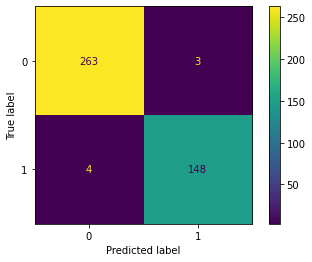

In [48]:
# As follows some metrics
acc = accuracy_score(y_test, y_hat)
prec = average_precision_score(y_test, y_hat, average='macro')
rec = recall_score(y_test, y_hat, average='macro')
f1scor = f1_score(y_test,y_hat,average='binary')
print('f1score = ', f1scor)
print('accuracy = ', acc)
print('precision = ', prec)
print('recall = ', rec)

# We plot the confusion matrix, that allow us to visualize where our model is behaving
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

ROC AUC:  0.988177681044717


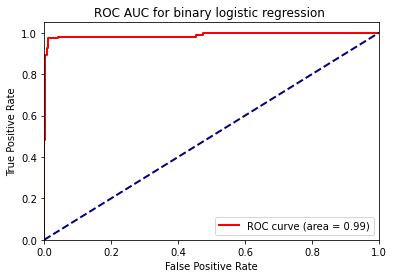

In [49]:
# We will now calculate the ROC AUC and plot it
# Learn to predict each class against the other
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve, ROC area and plot it
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC: ', roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC for binary logistic regression ')
plt.legend(loc="lower right")
plt.show()